# *Introduction*

Penyakit kardiovaskular/*cardiovascular diseases* (CVD) merupakan penyebab kematian nomor 1 di dunia. Sekitar 17,9 juta jiwa meninggal setiap tahunnyanya, menyumbang 31% dari total kematian di dunia. 

Untuk mencegahnya, diperlukan pendeteksian dini untuk orang-orang yang beresiko tinggi mengidap penyakit kardiovaskular. Pendeteksian dini dapat dilakukan dengan menggunakan *machine learning*. Dan *machine learning* yang digunakan dapat dilatih menggunakan dataset "Heart Failure Detection" yang bersumber dari Kaggle. 

Dataset "Heart Failure Detection" berisi 299 baris data dan 13 kolom data. Salah satu kolom diantaranya berisi informasi kematian akibat penyakit kardiovaskular, sedangkan 12 kolom lainnya berisi informasi berupa faktor-faktor yang dapat digunakan untuk mendeteksi resiko terjadinya kematian tadi.


# *Import Libraries*

*Import* library-library yang dibutuhkan untuk komputasi, struktur data, visualisasi, dan *modelling*.

In [116]:
%pip install numpy pandas matplotlib seaborn scikit-learn xgboost

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import xgboost

# *Data Loading*

*Load* dataset ke dalam Pandas *dataframe*.

In [118]:
df = pd.read_csv('./datasets/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# *Data Cleaning*

Cek nilai kosong/*missing values* pada dataset.

In [119]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Diketahui Tidak ada *missing values* pada dataset sehingga tidak perlu dilakukan penghapusan data yang bernilai kosong.

# *Data Exploration*

Tetapkan kolom *target* (kolom yang diprediksi) dan kolom *feature* (kolom untuk memprediksi) yang akan digunakan untuk *modelling*.

In [120]:
target_col = 'DEATH_EVENT'
feature_cols = df.drop([target_col], axis=1).columns.to_list()

print('Target Column:', target_col)
print('Feature Columns:', ', '.join(feature_cols))

Target Column: DEATH_EVENT
Feature Columns: age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time


Cek jumlah baris dan kolom padaset.

In [121]:
df.shape

(299, 13)

Diketahui terdapat 299 baris dan 13 kolom pada dataset.

Cek *measures of central tendency* dari dataset, seperti mean, median, dan modus.

In [122]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [123]:
df.mode().iloc[0]

age                             60.00
anaemia                          0.00
creatinine_phosphokinase       582.00
diabetes                         0.00
ejection_fraction               35.00
high_blood_pressure              0.00
platelets                   263358.03
serum_creatinine                 1.00
serum_sodium                   136.00
sex                              1.00
smoking                          0.00
time                           187.00
DEATH_EVENT                      0.00
Name: 0, dtype: float64

Cek *distribution* dan *variability* dari kolom-kolom dataset dengan histogram.

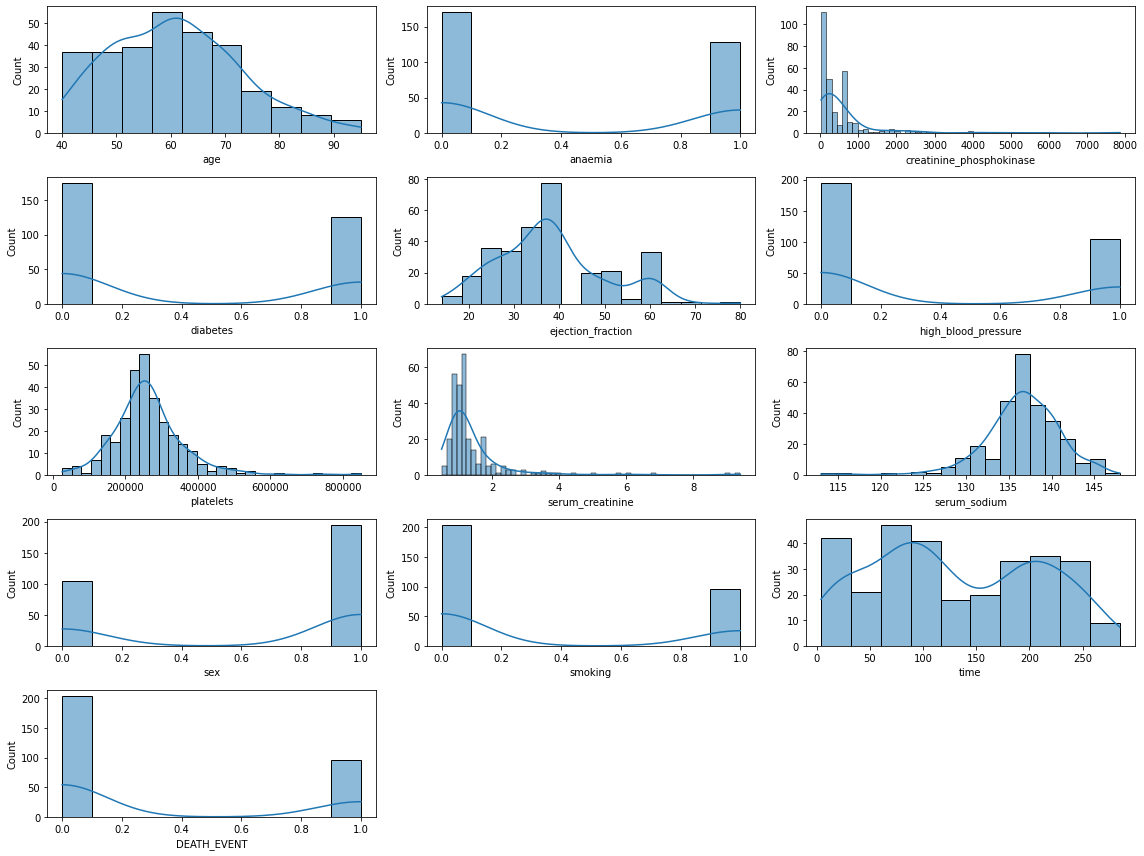

In [124]:
plt.figure(figsize=(16,12))
for i, col in enumerate(df.columns, 1):
  plt.subplot(5, 3, i)
  sns.histplot(df[col], kde=True)
  plt.tight_layout()
plt.show()

Terlihat kolom **creatinine_phosphokinase** dan **serum_creatinine** miring/*skew* secara signifikan.


Cek korelasi antara kolom *feature* dan kolom *target* (**DEATH EVENT**) dengan *heatmap*.

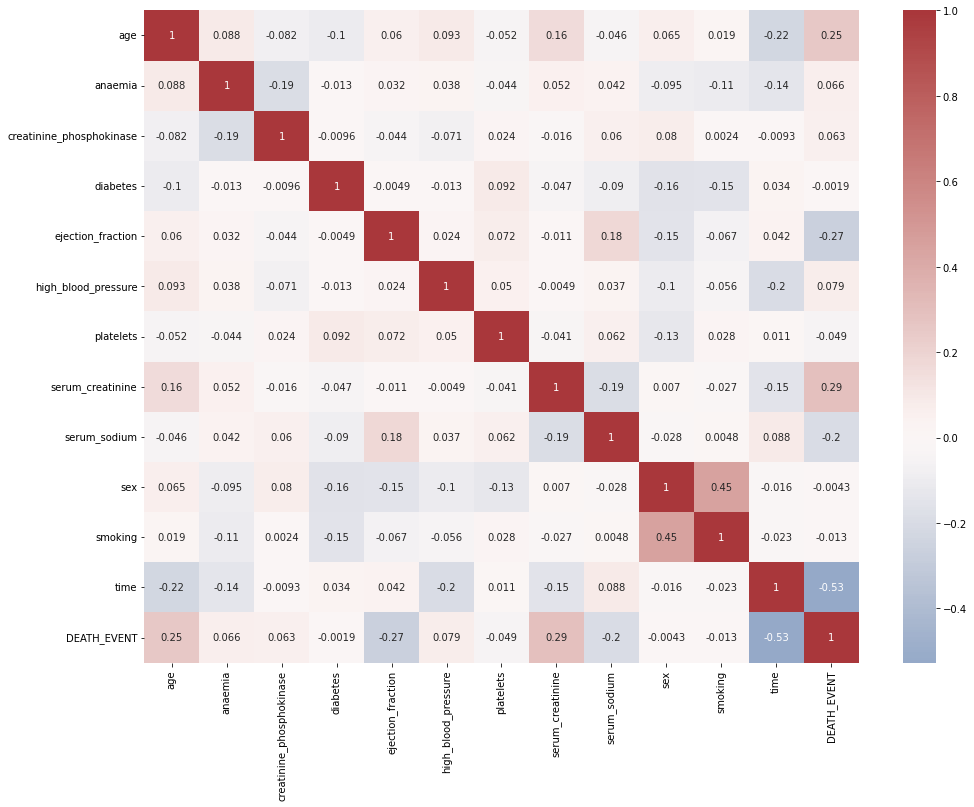

In [125]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='vlag', center=0)
plt.show()

Terlihat kolom **time**, **ejection_fraction**, dan **sorum_sodium** merupakan 3 kolom dengan korelasi positif tertinggi terhadap kolom target (**DEATH EVENT**)

Cek *outlier* pada kolom-kolom data non-biner dengan *box plot*.

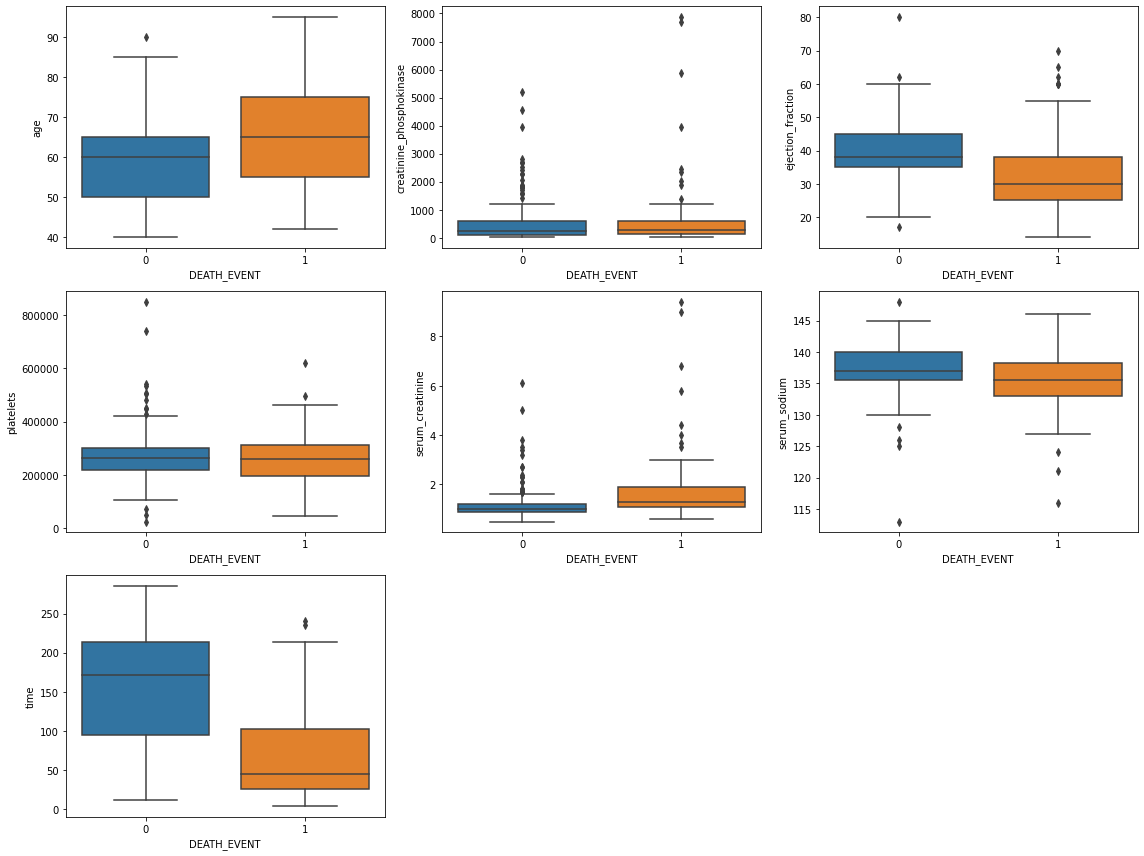

In [126]:
non_binary_cols = df.columns[df.isin((0,1)).all()]

plt.figure(figsize=(16,12))
for i, col in enumerate(df.drop(non_binary_cols, axis=1).columns, 1):
  plt.subplot(3, 3, i)
  sns.boxplot(df, x=target_col, y=col)
  plt.tight_layout()
plt.show()

Terlihat terdapat beberapa *outlier* pada semua kolom data non-biner, akan tetapi *outlier* tersebut tidak perlu dihapus mengingat dibutuhkannya data yang besar untuk mendapatkan akurasi model yang bagus.

# *Data Preprocessing*

Pisahkan dataset menjadi dataset *target* dan dataset *feature*.

In [127]:
X = df[feature_cols]
y = df[target_col]

Lakukan *standardization* untuk dataset *feature*.

In [128]:
X_cols = list(X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X_cols)

X_scaled.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02
mean,5.703353e-16,1.009969e-16,0.000000,9.060014e-17,-3.267546e-17,0.000000,7.723291e-17,1.425838e-16,-8.673849e-16,-8.911489e-18,-1.188199e-17,-1.901118e-16
std,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00,1.001676e+00
min,-1.754448e+00,-8.711048e-01,-0.576918,-8.475794e-01,-2.038387e+00,-0.735688,-2.440155e+00,-8.655094e-01,-5.363206e+00,-1.359272e+00,-6.876819e-01,-1.629502e+00
25%,-8.281242e-01,-8.711048e-01,-0.480393,-8.475794e-01,-6.841802e-01,-0.735688,-5.208700e-01,-4.782047e-01,-5.959961e-01,-1.359272e+00,-6.876819e-01,-7.389995e-01
50%,-7.022315e-02,-8.711048e-01,-0.342574,-8.475794e-01,-7.076750e-03,-0.735688,-1.390846e-02,-2.845524e-01,8.503384e-02,7.356882e-01,-6.876819e-01,-1.969543e-01
75%,7.718891e-01,1.147968e+00,0.000166,1.179830e+00,5.853888e-01,1.359272,4.111199e-01,5.926150e-03,7.660638e-01,7.356882e-01,1.454161e+00,9.387595e-01
max,2.877170e+00,1.147968e+00,7.514640,1.179830e+00,3.547716e+00,1.359272,6.008180e+00,7.752020e+00,2.582144e+00,7.356882e-01,1.454161e+00,1.997038e+00


Cek dataset feature yang telah ter-*standardized* dengan *box plot*.

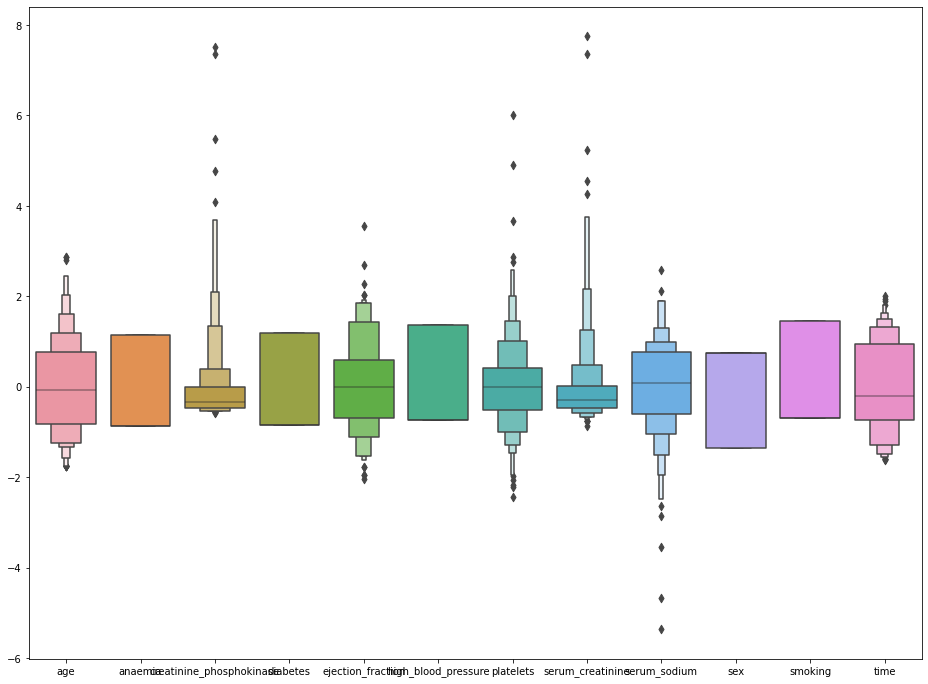

In [129]:
plt.figure(figsize=(16,12))
sns.boxenplot(X_scaled)
plt.show()

Terlihat semua kolom data yang ter-*standardize* memiliki median yang sama, yakni 0.

Pisahkan kembali dataset *target* dan dataset *feature* menjadi dataset *target* untuk *training*, dataset *target* untuk *testing*, dataset *feature* untuk *training*, dan dataset *feature* untuk *testing*.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=25)

# *Modelling*

In [131]:
def plot_confusion_matrix(y_test, y_pred, ticks):
  cf_matrix = confusion_matrix(y_test, y_pred)
  
  plt.figure(figsize=(8,6))
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='vlag', center=0)
  plt.xticks(np.array(range(2))+0.5, ticks)
  plt.yticks(np.array(range(2))+0.5, ticks)
  plt.show()

## Logistic Regression

In [132]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

print('Accuracy score of Logistic Regression: ', '{:.2f}%'.format(100* lr_acc))
print('F1 score of Logistic Regression: ', '{:.2f}%'.format(100* lr_f1))

Accuracy score of Logistic Regression:  84.44%
F1 score of Logistic Regression:  76.67%


In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        60
           1       0.77      0.77      0.77        30

    accuracy                           0.84        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.84      0.84      0.84        90



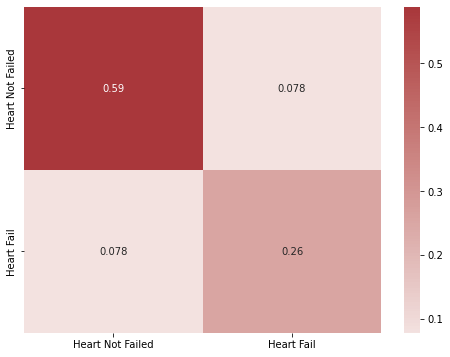

In [134]:
plot_confusion_matrix(y_test, y_pred, ticks=('Heart Not Failed', 'Heart Fail'))

## K-Nearest Neighbors (KNN)

In [135]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print('Accuracy score of KNN: ', '{:.2f}%'.format(100* knn_acc))
print('F1 score of KNN: ', '{:.2f}%'.format(100* knn_f1))

Accuracy score of KNN:  72.22%
F1 score of KNN:  32.43%


In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.98      0.83        60
           1       0.86      0.20      0.32        30

    accuracy                           0.72        90
   macro avg       0.78      0.59      0.57        90
weighted avg       0.76      0.72      0.66        90



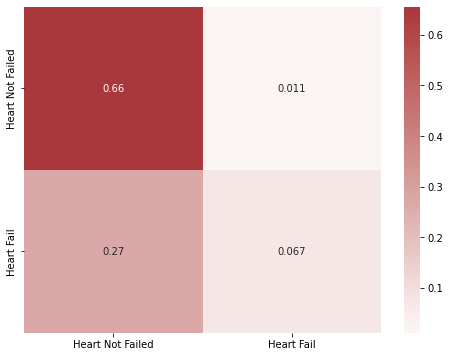

In [137]:
plot_confusion_matrix(y_test, y_pred, ticks=('Heart Not Failed', 'Heart Fail'))

## Support Vector Machine (SVM)

In [138]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

svm_acc = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

print('Accuracy score of SVM: ', '{:.2f}%'.format(100* svm_acc))
print('F1 score of SVM: ', '{:.2f}%'.format(100* svm_f1))

Accuracy score of SVM:  78.89%
F1 score of SVM:  67.80%


In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



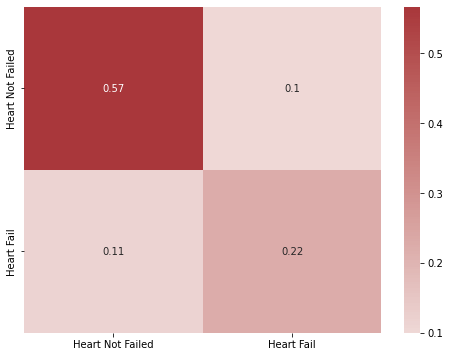

In [140]:
plot_confusion_matrix(y_test, y_pred, ticks=('Heart Not Failed', 'Heart Fail'))

## Naive Bayes

In [141]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print('Accuracy score of Naive Bayes: ', '{:.2f}%'.format(100* nb_acc))
print('F1 score of Naive Bayes: ', '{:.2f}%'.format(100* nb_f1))

Accuracy score of Naive Bayes:  74.44%
F1 score of Naive Bayes:  58.18%


In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        60
           1       0.64      0.53      0.58        30

    accuracy                           0.74        90
   macro avg       0.71      0.69      0.70        90
weighted avg       0.74      0.74      0.74        90



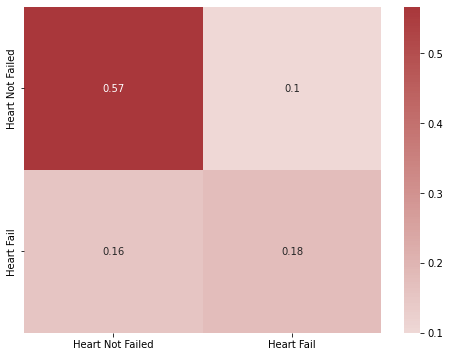

In [143]:
plot_confusion_matrix(y_test, y_pred, ticks=('Heart Not Failed', 'Heart Fail'))

## Decision Tree

In [144]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print('Accuracy score of Decision Tree: ', '{:.2f}%'.format(100* dt_acc))
print('F1 score of Decision Tree: ', '{:.2f}%'.format(100* dt_f1))

Accuracy score of Decision Tree:  80.00%
F1 score of Decision Tree:  68.97%


In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        60
           1       0.71      0.67      0.69        30

    accuracy                           0.80        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.80      0.80      0.80        90



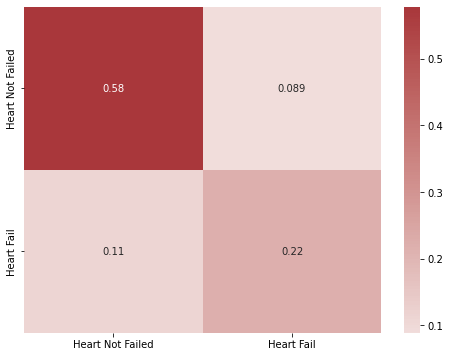

In [146]:
plot_confusion_matrix(y_test, y_pred, ticks=('Heart Not Failed', 'Heart Fail'))

## Random Forest

In [147]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print('Accuracy score of Random Forest: ', '{:.2f}%'.format(100* rf_acc))
print('F1 score of Random Forest: ', '{:.2f}%'.format(100* rf_f1))

Accuracy score of Random Forest:  85.56%
F1 score of Random Forest:  77.19%


In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        60
           1       0.81      0.73      0.77        30

    accuracy                           0.86        90
   macro avg       0.84      0.82      0.83        90
weighted avg       0.85      0.86      0.85        90



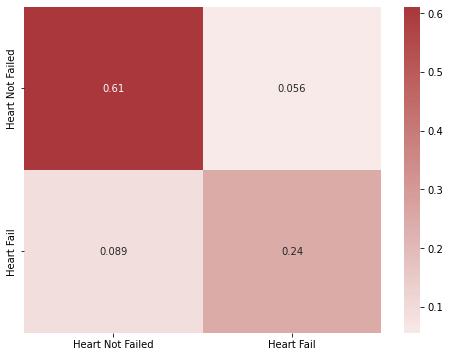

In [149]:
plot_confusion_matrix(y_test, y_pred, ticks=('Heart Not Failed', 'Heart Fail'))

## XGBoost

In [150]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_acc = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)

print('Accuracy score of XGBoost: ', '{:.2f}%'.format(100* xgb_acc))
print('F1 score of XGBoost: ', '{:.2f}%'.format(100* xgb_f1))

Accuracy score of XGBoost:  81.11%
F1 score of XGBoost:  71.19%


In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        60
           1       0.72      0.70      0.71        30

    accuracy                           0.81        90
   macro avg       0.79      0.78      0.79        90
weighted avg       0.81      0.81      0.81        90



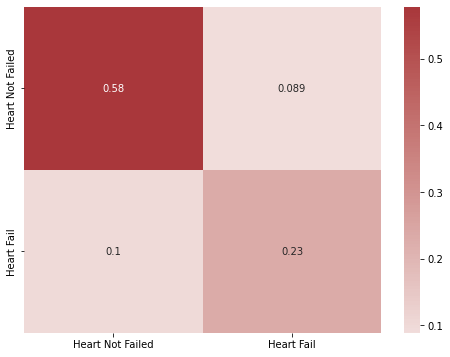

In [152]:
plot_confusion_matrix(y_test, y_pred, ticks=('Heart Not Failed', 'Heart Fail'))

# *Model Evaluation*

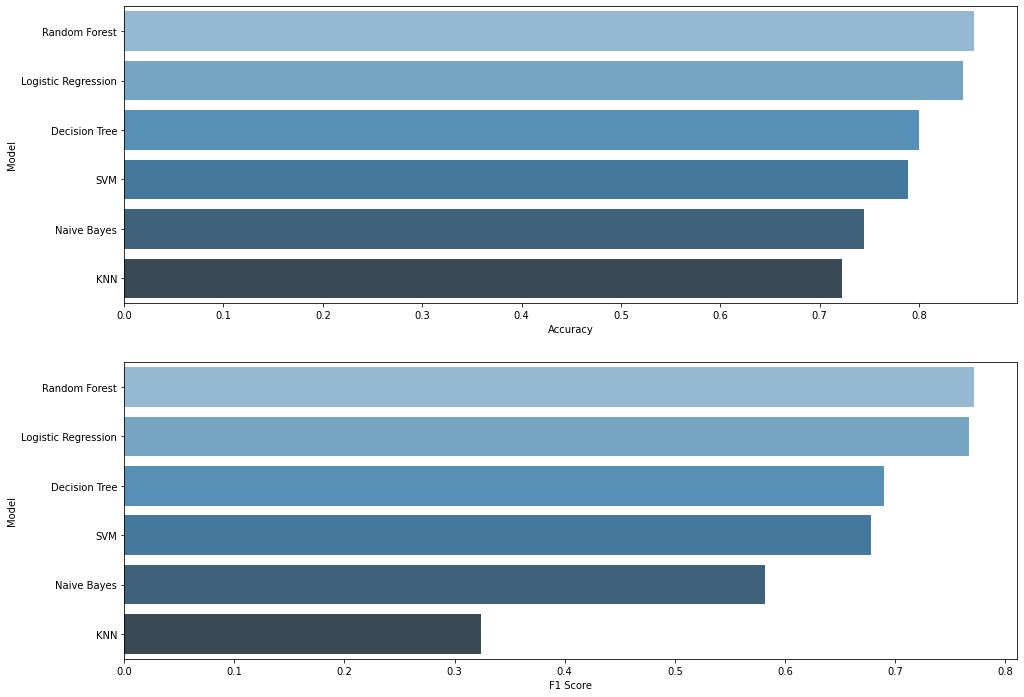

In [178]:
model_comparison_df = pd.DataFrame({'Model': ('Logistic Regression', 'KNN', 'SVM', 
                                              'Naive Bayes', 'Decision Tree', 'Random Forest',),
                                   'Accuracy': (lr_acc, knn_acc, svm_acc, 
                                                nb_acc, dt_acc, rf_acc),
                                   'F1 Score': (lr_f1, knn_f1, svm_f1, 
                                                nb_f1, dt_f1, rf_f1)})
metric_cols = ('Accuracy', 'F1 Score')

plt.figure(figsize=(16,12))
for i, col in enumerate(metric_cols, 1):
  plt.subplot(len(metric_cols), 1, i)
  sns.barplot(model_comparison_df.sort_values(col, ascending=False), x=col, y='Model', palette='Blues_d')
plt.show()